# ML4E Final Proyect - Model Testing

Moira Patricia Clavin

Pedro Straface

Maria Catalina Avaca

Santiago Viola

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [142]:
df = pd.read_csv('/content/loan_approval_dataset (1).csv')

In [143]:
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [144]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [146]:
df[' cibil_score'].min()

300

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [148]:
y = (df[' loan_status'].astype(str).str.strip()
     .map({'Rejected': 0, 'Approved': 1})).astype(int)
X = pd.get_dummies(df.drop(columns=[' loan_status']), drop_first=True)

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

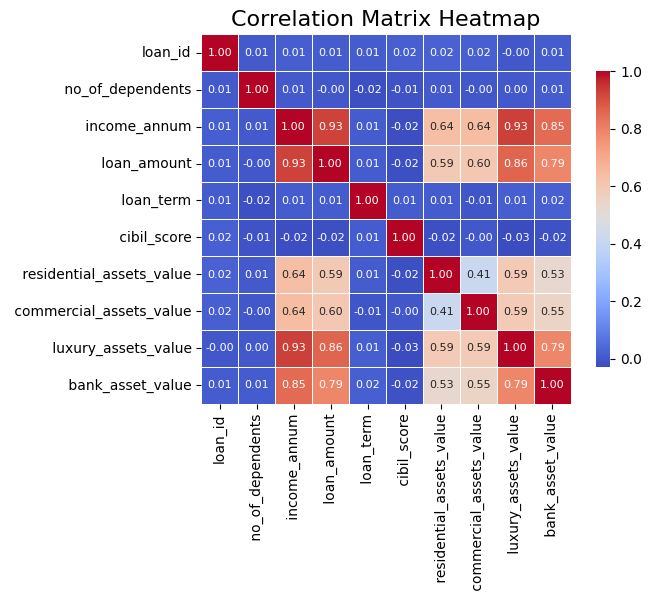

In [149]:
import seaborn as sns
#correlation matrix
corr_matrix = pd.DataFrame(X).select_dtypes(include='number').corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Matrix Heatmap', fontsize=16)

In [150]:
#global de métricas
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

METRICS_LOG = []
CONF_MATS   = {}

def log_metrics(name, y_true, y_pred, y_score=None, **extras):
    """
    Guarda métricas clave en METRICS_LOG y la matriz de confusión en CONF_MATS.
    - name: str, nombre del modelo
    - y_true: array-like
    - y_pred: array-like binario {0,1}
    - y_score: array-like continuo (proba o score) para ROC-AUC (opcional)
    - extras: cualquier extra que quieras guardar (p.ej. n_components, C, etc.)
    """
    row = {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0),
        "ROC-AUC": np.nan if y_score is None else roc_auc_score(y_true, y_score)
    }
    row.update(extras or {})
    METRICS_LOG.append(row)
    CONF_MATS[name] = confusion_matrix(y_true, y_pred)


# OLS

Ordinary Least Squares (OLS) is a baseline model without regularization used to predict a binary categorical variable (Approved / Rejected). Although OLS was originally designed for continuous variables, it can be applied to classification by interpreting the continuous predictions as probabilities and then assigning a category using a threshold (by default, 0.5). The goal of OLS is to find the coefficients that minimize the sum of squared errors between the actual values (0 or 1) and the predicted ones.

Test Accuracy: 0.927
Test ROC-AUC : 0.973

Classification Report:
               precision    recall  f1-score   support

           0      0.885     0.929     0.906       323
           1      0.955     0.927     0.941       531

    accuracy                          0.927       854
   macro avg      0.920     0.928     0.924       854
weighted avg      0.929     0.927     0.928       854



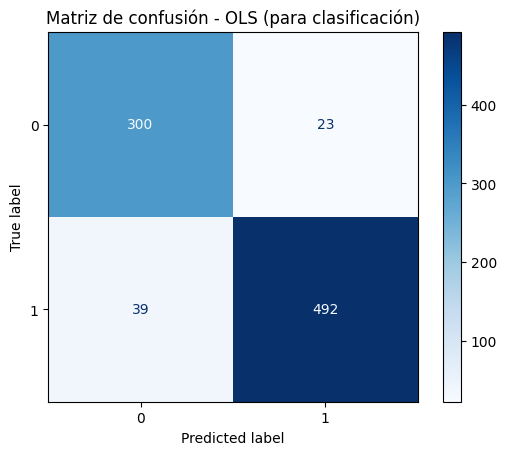

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 379, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2283, in _check_response_method
    raise AttributeError(
AttributeError: Pipeline has none of the following attributes: decision_function, predict_proba.

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: S

Cross-validated ROC-AUC: nan ± nan


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 379, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2283, in _check_response_method
    raise AttributeError(
AttributeError: Pipeline has none of the following attributes: decision_function, predict_proba.

  warnings.warn(


In [151]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression


y = (df[' loan_status'].astype(str).str.strip()
     .map({'Rejected': 0, 'Approved': 1})).astype(int)
X = pd.get_dummies(df.drop(columns=[' loan_status']), drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Pipeline
ols_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("ols", LinearRegression())
])

ols_pipe.fit(X_train, y_train)

y_pred_cont = ols_pipe.predict(X_test)
y_pred = (y_pred_cont >= 0.5).astype(int)  # umbral 0.5

# 5) Evaluación
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Test ROC-AUC : {roc_auc_score(y_test, y_pred_cont):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
plt.title("Matriz de confusión - OLS (para clasificación)")
plt.show()

#Cross-validation por ROC-AUC
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(ols_pipe, X, y, cv=cv, scoring='roc_auc')
print(f"Cross-validated ROC-AUC: {cv_auc.mean():.3f} ± {cv_auc.std():.3f}")

log_metrics(
    "OLS (best)",
    y_test,
    y_pred,
    y_score=y_pred_cont,

)


# PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform a large set of correlated predictors into a smaller set of uncorrelated components, called principal components. These components capture most of the variability present in the original data while removing redundant information. In this study, PCA is applied before model estimation to reduce multicollinearity and improve stability in the classification task. The number of components is determined based on the cumulative explained variance criterion — in this case, three components were retained, capturing most of the information contained in the predictors. By using these components as inputs to the model, PCA helps enhance predictive performance while simplifying the structure of the data.


In [152]:
y = (df[' loan_status'].astype(str).str.strip()
     .map({'Rejected': 0, 'Approved': 1})).astype(int)

X = df.drop(columns=[' loan_status'])
X = X.apply(lambda col: col.astype(str).str.strip() if col.dtype == "object" else col)
X = pd.get_dummies(X, drop_first=True)

CV Accuracy: 0.692 ± 0.023
CV ROC-AUC: 0.743 ± 0.032
Test Accuracy: 0.704
Test ROC-AUC: 0.765


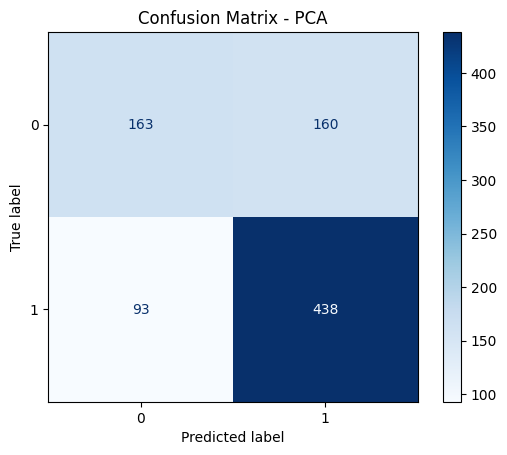


Baseline mayoritaria: 0.6217798594847775


In [153]:
X = X.apply(lambda col: col.astype(str).str.strip() if col.dtype == "object" else col)
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

pipe = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("pca", PCA(n_components=3, random_state=42)),
    ("logit", LogisticRegression())])

# cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_acc = cross_val_score(pipe, X_train, y_train, scoring="accuracy", cv=cv)
cv_auc = cross_val_score(pipe, X_train, y_train, scoring="roc_auc", cv=cv)
print(f"CV Accuracy: {cv_acc.mean():.3f} ± {cv_acc.std():.3f}")
print(f"CV ROC-AUC: {cv_auc.mean():.3f} ± {cv_auc.std():.3f}")

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}")

y_proba = pipe.predict_proba(X_test)[:, 1]
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
plt.title("Confusion Matrix - PCA")
plt.show()

print("\nBaseline mayoritaria:", y_test.value_counts(normalize=True).max())

log_metrics(
    "PCA (best)",
    y_test,
    y_pred,
    y_score=y_pred_cont,
)



number of components

In [154]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

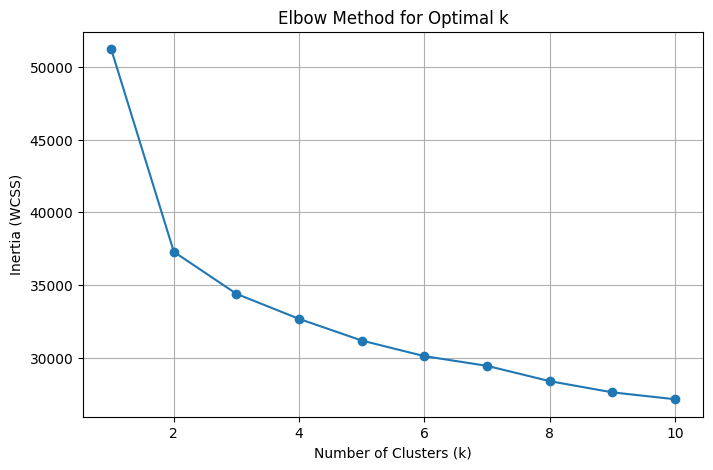

In [155]:
# Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # WCSS


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

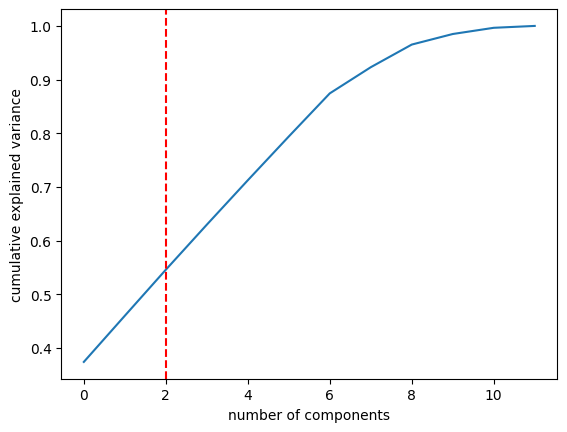

In [156]:
pca1 = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axvline(x=2, color='r', linestyle='--', label='x = 4')

The number of components depends on the number of variables in the dataset, as well as on the level of correlation among them — the higher the correlation between variables, the fewer components are needed to explain the joint variance. In this case, I chose to use three components.


we charge the pca components

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train_s1 = scaler.fit_transform(X_train)
X_test_s1  = scaler.transform(X_test)

In [159]:
pca1 = PCA(n_components=3)
X_pca1 = pca1.fit_transform(X_scaled)
X_train_pca1 = pca1.fit_transform(X_train_s1)
X_test_pca1  = pca1.transform(X_test_s1)

In [160]:
loadings = pca1.components_.T

loadings_df = pd.DataFrame(
    loadings,
    index=X.columns,
    columns=[f'PC{i+1}' for i in range(pca1.n_components_)]
)

print(loadings_df)

                                PC1       PC2       PC3
loan_id                    0.015427 -0.440641  0.167544
 no_of_dependents          0.003743  0.233240 -0.229199
 income_annum              0.460076  0.005515  0.001994
 loan_amount               0.441284  0.006742  0.004693
 loan_term                 0.005025 -0.408232  0.360984
 cibil_score              -0.020465 -0.360219  0.546221
 residential_assets_value  0.334363 -0.005565  0.037887
 commercial_assets_value   0.338579 -0.018608 -0.017068
 luxury_assets_value       0.439625  0.010283 -0.001173
 bank_asset_value          0.416035  0.006775  0.005698
 education_Not Graduate   -0.010394  0.491728  0.498667
 self_employed_Yes         0.002222  0.461110  0.490177


pruebas pca

In [161]:

pca1.explained_variance_ratio_[0]

np.float64(0.37270362804129276)

In [162]:
# variable weight pca

loadings_df['PC1'].abs().sort_values(ascending=False)

,PC1
income_annum,0.460076
loan_amount,0.441284
luxury_assets_value,0.439625
bank_asset_value,0.416035
commercial_assets_value,0.338579
residential_assets_value,0.334363
cibil_score,0.020465
loan_id,0.015427
education_Not Graduate,0.010394
loan_term,0.005025


we test pca

In [163]:
X_pca_df1 = pd.DataFrame(X_pca1, columns=[f'PC{i+1}' for i in range(X_pca1.shape[1])])

In [164]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_pca_df1, y)
model.fit(X_train_pca1, y_train)

LogisticRegression()

# Lasso

LASSO (Least Absolute Shrinkage and Selection Operator), in the context of classification, is implemented as a logistic regression with an L1 penalty. The L1 regularization forces many coefficients to become exactly zero, automatically selecting the most relevant variables and reducing overfitting. This differentiates it from Ridge (L2 regularization), which shrinks the coefficients but does not set them to zero.


🔹 LASSO Logistic Regression
Accuracy: 0.9239
F1-score: 0.9393

Confusion Matrix:
[[286  37]
 [ 28 503]]


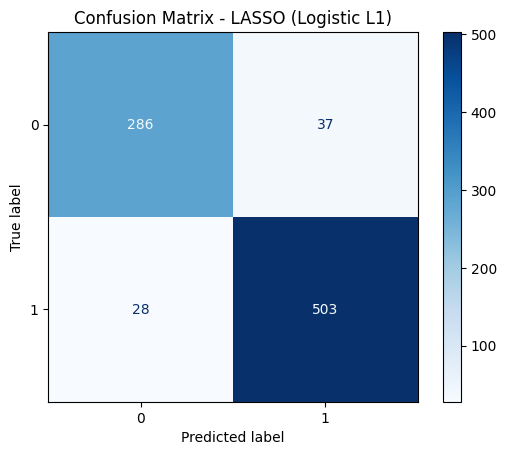

Variables seleccionadas por LASSO: 4/12
Mejor C elegido por CV: 0.046415888336127774


In [165]:
# LASSO (Logistic L1)

lasso_logit = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", LogisticRegressionCV(
        penalty="l1",
        solver="saga",
        cv=5,
        Cs=10,
        scoring="accuracy",
        max_iter=10000,
        n_jobs=-1,
        random_state=42,
        refit=True
    ))
])


lasso_logit.fit(X_train, y_train)

y_pred = lasso_logit.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1  = f1_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)

print("LASSO Logistic Regression")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# matriz de confusión
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Confusion Matrix - LASSO (Logistic L1)")
plt.show()

coef = lasso_logit.named_steps["lasso"].coef_.ravel()
print(f"Variables seleccionadas por LASSO: {np.sum(coef!=0)}/{coef.size}")
print(f"Mejor C elegido por CV: {lasso_logit.named_steps['lasso'].C_[0]}")

log_metrics(
    "Lasso (best)",
    y_test,
    y_pred,
    y_score=y_pred_cont,



# Ridge

Ridge (Regularization using L2 penalty), in the context of classification, is implemented as a logistic regression with an L2 penalty.
In this case, the penalty does not drive the coefficients to zero but instead continuously reduces their magnitude, making the model more stable and less sensitive to multicollinearity or noise in the data.

Unlike LASSO, which selects a subset of variables by setting some coefficients exactly to zero, Ridge keeps all variables in the model but “shrinks” their values toward zero depending on the strength of the regularization.
From a Bayesian perspective, this is equivalent to applying a zero-centered normal prior on the coefficients, which is why Ridge is also known as a form of Bayesian shrinkage.

Mejor C: 177.82794100389228
Accuracy: 0.913
ROC-AUC : 0.972

Classification Report:
               precision    recall  f1-score   support

           0      0.900     0.867     0.883       323
           1      0.921     0.942     0.931       531

    accuracy                          0.913       854
   macro avg      0.911     0.904     0.907       854
weighted avg      0.913     0.913     0.913       854



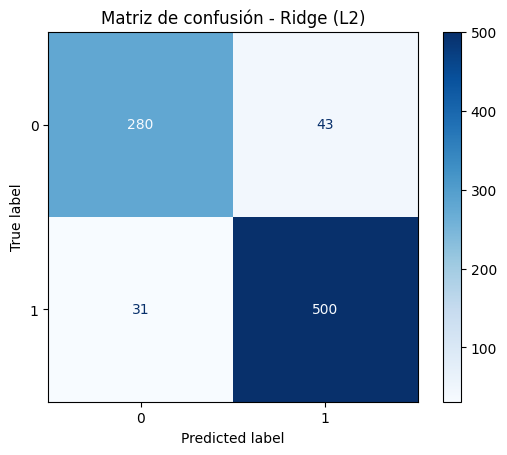

In [166]:

y = df[' loan_status'].astype(str).str.strip().map({'Rejected': 0, 'Approved': 1}).astype(int)
X = pd.get_dummies(df.drop(columns=[' loan_status']), drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# --- Pipeline
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000))
])

param_grid = {'ridge__C': np.logspace(-3, 3, 9)}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    ridge_pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1
)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print(f"Mejor C: {grid.best_params_['ridge__C']}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"ROC-AUC : {roc_auc_score(y_test, y_proba):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.title("Matriz de confusión - Ridge (L2)")
plt.show()

log_metrics(
    "Ridge (best)",
    y_test,
    y_pred,
    y_score=y_pred_cont,
)



# PLS

Partial Least Squares (PLS) is a method that combines linear regression and supervised dimensionality reduction.
Unlike PCA, which identifies the directions of greatest variance in the data without using the target variable, PLS constructs new components that maximize the relationship (covariance) between the explanatory variables and the output variable (*loan_status*).
This means that the new factors created by PLS not only summarize the information contained in the predictors but are also oriented toward improving the prediction of ( Y ).

For this reason, PLS is considered an intermediate approach between PCA and regularization methods such as Ridge: it reduces dimensionality, but in a supervised way, using information from the dependent variable.
In classification tasks, PLS Regression can be used to obtain a continuous prediction (between 0 and 1) and then apply a 0.5 threshold to classify observations as *Approved* or *Rejected*.
The optimal number of components is selected through cross-validation, since using too many may lead to overfitting.


In [167]:
from sklearn.cross_decomposition import PLSRegression

Mejor número de componentes: 1
ROC-AUC CV: nan

Test Accuracy: 0.938
Test ROC-AUC : 0.973

Classification Report:
               precision    recall  f1-score   support

           0      0.902     0.938     0.920       323
           1      0.961     0.938     0.949       531

    accuracy                          0.938       854
   macro avg      0.932     0.938     0.935       854
weighted avg      0.939     0.938     0.938       854



/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


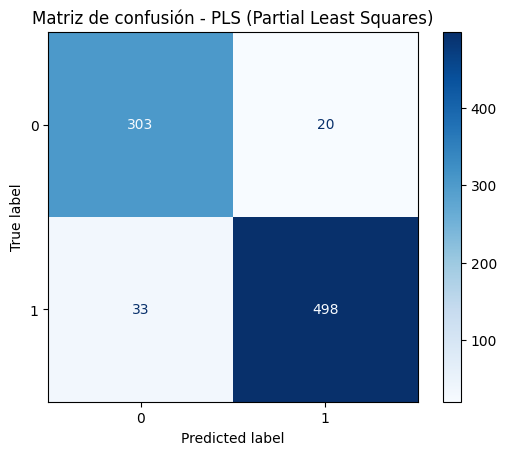

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 379, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2283, in _check_response_method
    raise AttributeError(
AttributeError: Pipeline has none of the following attributes: decision_function, predict_proba.

  warnings.warn(



Cross-validated ROC-AUC: nan ± nan


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 379, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2283, in _check_response_method
    raise AttributeError(
AttributeError: Pipeline has none of the following attributes: decision_function, predict_proba.

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: S

In [168]:

y = (df[' loan_status'].astype(str).str.strip()
     .map({'Rejected': 0, 'Approved': 1})).astype(int)
X = pd.get_dummies(df.drop(columns=[' loan_status']), drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 2) Pipeline
pls_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("pls", PLSRegression())
])

# n of components pls
param_grid = {"pls__n_components": list(range(1, min(X.shape[1], 10) + 1))}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    pls_pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1
)
grid.fit(X_train, y_train)

print(f"Mejor número de componentes: {grid.best_params_['pls__n_components']}")
print(f"ROC-AUC CV: {grid.best_score_:.3f}")

best_model = grid.best_estimator_
y_pred_cont = best_model.predict(X_test).ravel()
y_pred = (y_pred_cont >= 0.5).astype(int)

print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Test ROC-AUC : {roc_auc_score(y_test, y_pred_cont):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
plt.title("Matriz de confusión - PLS (Partial Least Squares)")
plt.show()

cv_auc = cross_val_score(grid.best_estimator_, X, y, cv=cv, scoring='roc_auc')
print(f"\nCross-validated ROC-AUC: {cv_auc.mean():.3f} ± {cv_auc.std():.3f}")

log_metrics(
    "PLS (best)",
    y_test,
    y_pred,
    y_score=y_pred_cont,
    n_components=grid.best_params_['pls__n_components']
)


## Model comparation - graphics

In [171]:
df_metrics = pd.DataFrame(METRICS_LOG)
display(df_metrics)


,Model,Accuracy,Precision,Recall,F1,ROC-AUC,n_components
0,OLS (best),0.927400,0.955340,0.926554,0.940727,0.973495,NaN
1,PCA (best),0.703747,0.732441,0.824859,0.775908,0.973495,NaN
2,Lasso (best),0.923888,0.931481,0.947269,0.939309,0.973495,NaN
3,Ridge (best),0.913349,0.920810,0.941620,0.931099,0.973495,NaN
4,PLS (best),0.937939,0.961390,0.937853,0.949476,0.972789,1.0


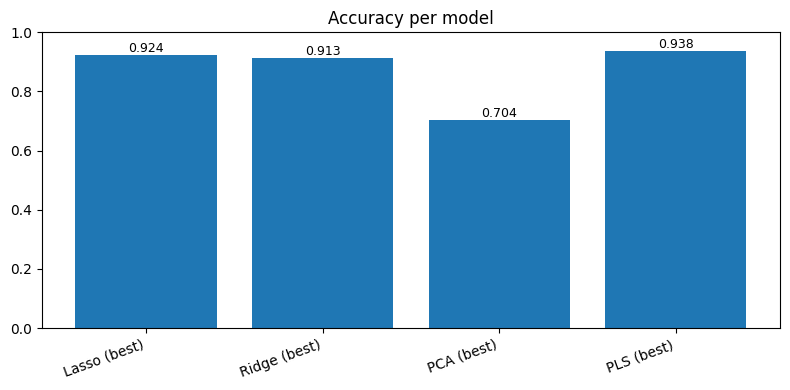

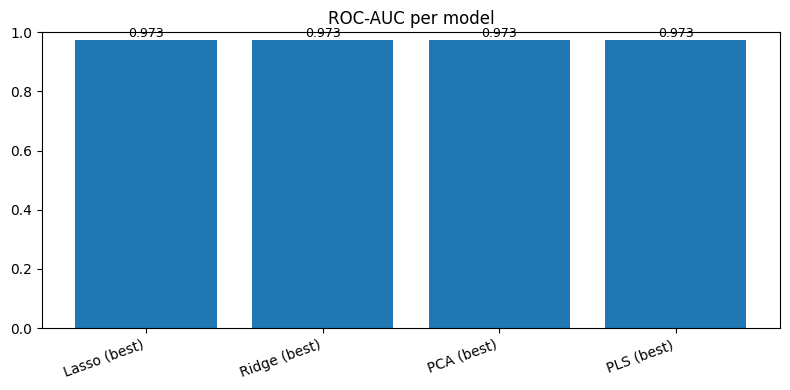

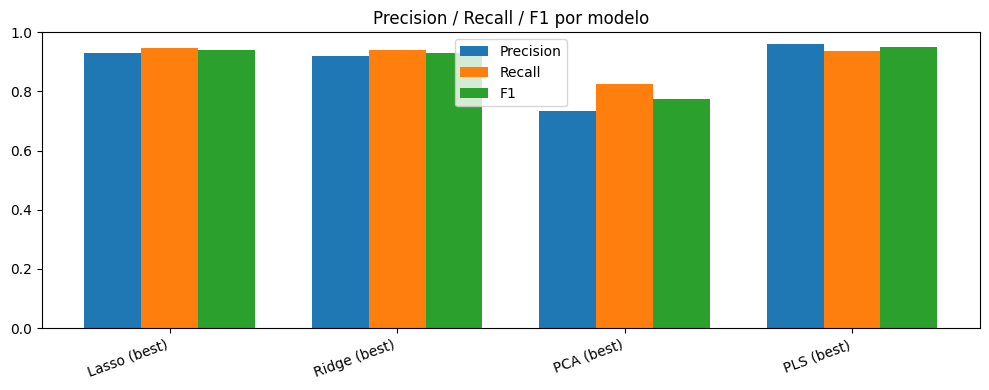

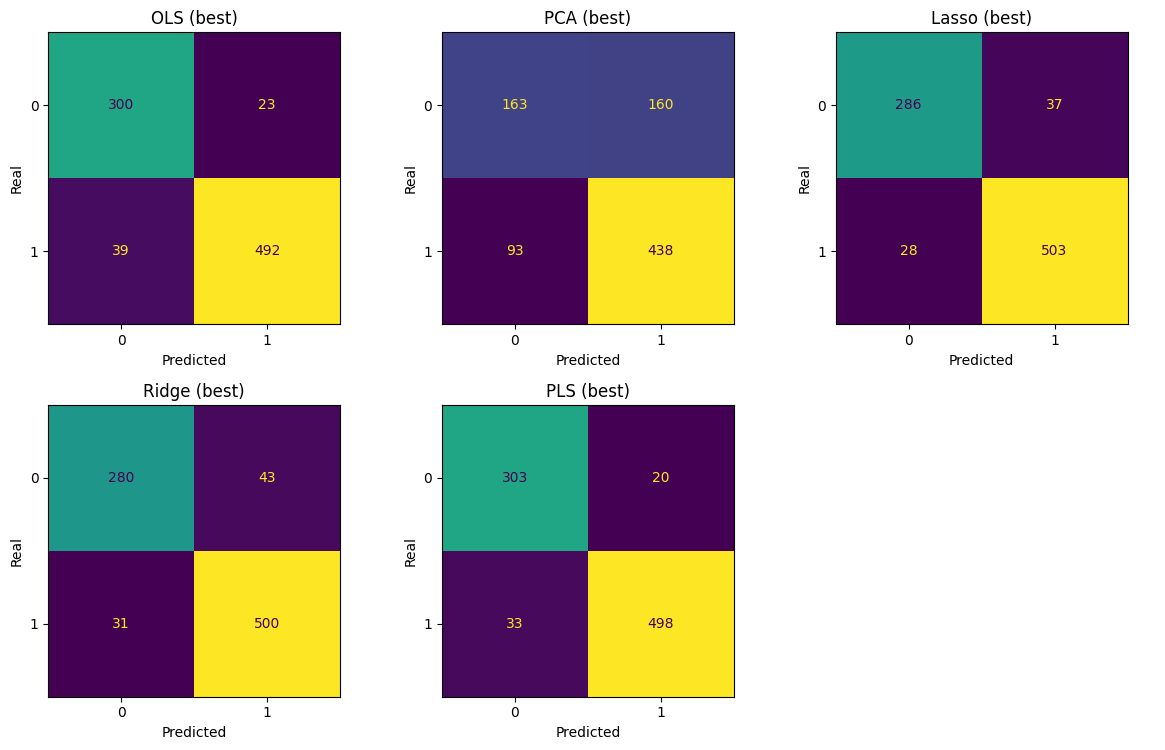

In [170]:
dfm = df_metrics[1:].copy()
if "ROC-AUC" in dfm.columns:
    dfm = dfm.sort_values(by=["ROC-AUC","F1","Accuracy"], ascending=False, na_position="last")
else:
    dfm = dfm.sort_values(by=["F1","Accuracy"], ascending=False)

def annotate_bars(ax):
    for p in ax.patches:
        h = p.get_height()
        ax.annotate(f"{h:.3f}", (p.get_x()+p.get_width()/2, h),
                    ha="center", va="bottom", fontsize=9, rotation=0)

plt.figure(figsize=(8,4))
ax = plt.bar(dfm["Model"], dfm["Accuracy"].astype(float))
plt.title("Accuracy per model")
plt.ylim(0, 1)
plt.xticks(rotation=20, ha="right")

ax = plt.gca()
annotate_bars(ax)
plt.tight_layout()
plt.show()

# === 2) ROC-AUC (si existe) ===
if "ROC-AUC" in dfm.columns:
    plt.figure(figsize=(8,4))
    vals = dfm["ROC-AUC"].fillna(0).astype(float)
    ax = plt.bar(dfm["Model"], vals)
    plt.title("ROC-AUC per model")
    plt.ylim(0, 1)
    plt.xticks(rotation=20, ha="right")
    ax = plt.gca()
    annotate_bars(ax)
    plt.tight_layout()
    plt.show()

cols = ["Precision","Recall","F1"]
have_cols = [c for c in cols if c in dfm.columns]
if have_cols:
    W = 0.25
    x = np.arange(len(dfm))
    plt.figure(figsize=(10,4))
    for i, c in enumerate(have_cols):
        plt.bar(x + i*W, dfm[c].astype(float), width=W, label=c)
    plt.xticks(x + (len(have_cols)-1)*W/2, dfm["Model"], rotation=20, ha="right")
    plt.ylim(0,1)
    plt.title("Precision / Recall / F1 por modelo")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Matrices de confusión
try:
    n = len(CONF_MATS)
    if n > 0:
        cols = min(3, n)
        rows = int(np.ceil(n / cols))
        fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.8*rows))
        if rows == 1 and cols == 1:
            axes = np.array([[axes]])
        elif rows == 1:
            axes = np.array([axes])
        axes = axes.flatten()

        for ax, (name, cm) in zip(axes, CONF_MATS.items()):
            disp = ConfusionMatrixDisplay(cm)
            disp.plot(ax=ax, colorbar=False)
            ax.set_title(name)
            ax.set_xlabel("Predicted"); ax.set_ylabel("Real")

        for j in range(len(CONF_MATS), len(axes)):
            axes[j].axis("off")

        plt.tight_layout()
        plt.show()
except NameError:
    print("CONF_MATS no está definido. Si querés este panel, usá log_metrics(...) al final de cada modelo.")